In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)

In [3]:
#List all files within directory
print(os.listdir("Data/"))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [4]:
pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)
#pd.options.display.max_columns = None
#pd.options.display.max_rows = None

In [5]:
#List all files within directory
print(os.listdir("Data/"))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [6]:
#Relevant Data sets are listed below
df_train = pd.read_csv("Data/application_train.csv")
df_test = pd.read_csv("Data/application_test.csv")
df_bureau = pd.read_csv("Data/bureau.csv")
df_POS = pd.read_csv("Data/POS_CASH_balance.csv")
df_inst = pd.read_csv("Data/installments_payments.csv")

In [7]:
dftrain = df_train.copy()
test = df_test.copy()
bureau = df_bureau.copy()
POS = df_POS.copy()
inst_pmnt = df_inst.copy()

In [8]:
df_train.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

### Performing feature analysis on supplemental data bureau, POS_CASH, installments_payments that will later be merged with application_train to improve predictive analytics ###

In [9]:
df_bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [10]:
print("Bureau shape:", df_bureau.shape)
df_bureau.info()

Bureau shape: (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [11]:
df_bureau.select_dtypes('object').apply(pd.Series.unique, axis = 0)
#One hot encoding needed for Credit Active, Credit Currency, Credit Type since these are objects with more than 2 categorical variables

CREDIT_ACTIVE                       [Closed, Active, Sold, Bad debt]
CREDIT_CURRENCY     [currency 1, currency 2, currency 4, currency 3]
CREDIT_TYPE        [Consumer credit, Credit card, Mortgage, Car l...
dtype: object

In [12]:
df_POS.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [13]:
df_POS.NAME_CONTRACT_STATUS.unique()
#one hot encoding needed for NAME_CONTRACT_STATUS since more than 2 categorical variables

array(['Active', 'Completed', 'Signed', 'Approved',
       'Returned to the store', 'Demand', 'Canceled', 'XNA',
       'Amortized debt'], dtype=object)

In [14]:
df_POS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [15]:
df_inst.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [16]:
#checking if objects are listed in inst datasets
df_inst.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Series([], dtype: float64)

### Performing Feature Engineering ###

In [17]:
#performing one hot encoding on df_bureau and df_POS since catergorical variables are greater than 2
df_bureau = pd.get_dummies(df_bureau)
df_POS = pd.get_dummies(df_POS)

In [18]:
#### Since our data will be merged with application train we take the average mean for each column for each dataset ###
#### This is done by dong pivot table ####

In [19]:
df_POS_new = pd.pivot_table(df_POS, index=['SK_ID_CURR'], aggfunc=[np.mean])
df_bureau_new = pd.pivot_table(df_bureau, index=['SK_ID_CURR'], aggfunc=[np.mean])
df_inst_new = pd.pivot_table(df_inst, index=['SK_ID_CURR'], aggfunc = [np.mean])
df_POS_new.reset_index()
df_bureau_new.reset_index()
df_inst_new.reset_index()

SK_ID_CURR           mean                                   \
                  AMT_INSTALMENT   AMT_PAYMENT DAYS_ENTRY_PAYMENT   
0          100001    5885.132143   5885.132143       -2195.000000   
1          100002   11559.247105  11559.247105        -315.421053   
2          100003   64754.586000  64754.586000       -1385.320000   
3          100004    7096.155000   7096.155000        -761.666667   
4          100005    6240.205000   6240.205000        -609.555556   
...           ...            ...           ...                ...   
339582     456251    7492.924286   7492.924286        -156.285714   
339583     456252   10069.867500  10069.867500       -2393.833333   
339584     456253    4399.707857   4115.915357       -2387.428571   
339585     456254   10239.832895  10239.832895        -161.263158   
339586     456255   41464.713649  47646.215878        -472.013514   

                                                                     \
       DAYS_INSTALMENT NUM_INSTALMENT_NUMBER NUM_INSTALMENT_VERSION   
0         -2187.714286              2.714286               1.142857   
1          -295.000000             10.000000               1.052632   
2         -1378.160000              5.080000               1.040000   
3          -754.000000              2.000000               1.333333   
4          -586.000000              5.000000               1.111111   
...                ...                   ...                    ...   
339582     -120.000000              4.000000               1.142857   
339583    -2391.000000              3.500000               1.000000   
339584    -2372.928571              4.785714               1.000000   
339585     -142.263158              5.263158               1.000000   
339586     -463.945946              8.851351               1.824324   

                      
          SK_ID_PREV  
0       1.576389e+06  
1       1.038818e+06  
2       2.290070e+06  
3       1.564014e+06  
4       2.495675e+06  
...              ...  
339582  2.248017e+06  
339583  1.503599e+06  
339584  1.753310e+06  
339585  1.898777e+06  
339586  1.969824e+06  

[339587 rows x 8 columns]

Reconverting the averaged Datasets from pivot tables back to DataFrames and removal of strings from columns names

In [20]:
df_POS_new = pd.DataFrame(df_POS_new.to_records())

In [21]:
df_POS_new.columns = df_POS_new.columns.str.strip("(").str.strip(")").str.strip(" ").str.strip(",").str.strip("'('mean', ")

In [22]:
df_bureau_new = pd.DataFrame(df_bureau_new.to_records())

In [23]:
df_bureau_new.columns = df_bureau_new.columns.str.strip("(").str.strip(")").str.strip(" ").str.strip(",").str.strip("'('mean', ")

In [24]:
df_inst_new = pd.DataFrame(df_inst_new.to_records())

In [25]:
df_inst_new.columns = df_inst_new.columns.str.strip("(").str.strip(")").str.strip(" ").str.strip(",").str.strip("'('mean', ")

In [26]:
#### Removal of unecessary columns ####

In [27]:
df_POS_new = df_POS_new.drop(columns =['SK_ID_PREV'], axis=1)
df_bureau_new = df_bureau_new.drop(columns = ['SK_ID_BUREAU'], axis=1)
df_inst_new = df_inst_new.drop(columns = ['SK_ID_PREV'], axis=1)

In [28]:
##### Merging with application train and test dataset ####

In [29]:
df_inst_new.columns

Index(['SK_ID_CURR', 'AMT_INSTALMENT', 'AMT_PAYMENT', 'DAYS_ENTRY_PAYMENT',
       'DAYS_INSTALMENT', 'NUM_INSTALMENT_NUMBER', 'NUM_INSTALMENT_VERSION'],
      dtype='object')

In [30]:
print(df_train.shape, df_inst_new.shape)

(307511, 122) (339587, 7)


In [31]:
#### Merging Data Frames to training and test dataframe ####

In [32]:
df_train['SK_ID_CURR'] = df_inst_new['SK_ID_CURR']
df_test['SK_ID_CURR'] = df_test['SK_ID_CURR']
df_train = pd.merge(df_train, df_inst_new, on='SK_ID_CURR', how='left')
df_test = pd.merge(df_test, df_inst_new, on='SK_ID_CURR', how='left')

In [33]:
print(df_train.shape, df_inst_new.shape)

(307511, 128) (339587, 7)


In [34]:
df_train['SK_ID_CURR'] = df_bureau_new['SK_ID_CURR']
df_test['SK_ID_CURR'] = df_test['SK_ID_CURR']
df_train = pd.merge(df_train, df_bureau_new, on='SK_ID_CURR', how='left')
df_test = pd.merge(df_test, df_bureau_new, on='SK_ID_CURR', how='left')

In [35]:
df_train['SK_ID_CURR'] = df_POS_new['SK_ID_CURR']
df_train['SK_ID_CURR'] = df_POS_new['SK_ID_CURR']
df_train = pd.merge(df_train, df_POS_new, on='SK_ID_CURR', how='left')
df_test = pd.merge(df_test, df_POS_new, on='SK_ID_CURR', how='left')

In [36]:
df_train.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

#### Exploratory Data Analytics(EDA) ####

In [37]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [38]:
# Missing values statistics
missing_values = missing_values_table(df_train)
missing_values.head(20)

Your selected dataframe has 177 columns.
There are 106 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_MODE,214865,69.9
COMMONAREA_AVG,214865,69.9
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4


In [39]:
#drop columns with more than 65% of missing values

In [40]:
df_train = df_train.loc[:, df_train.isin([np.nan]).mean() < .65]

In [41]:
# Missing values statistics
missing_values = missing_values_table(df_train)
missing_values.head(68)

Your selected dataframe has 160 columns.
There are 89 columns that have missing values.


,Missing Values,% of Total Values
AMT_ANNUITY_y,189287,61.6
LANDAREA_MEDI,182590,59.4
LANDAREA_AVG,182590,59.4
LANDAREA_MODE,182590,59.4
BASEMENTAREA_MEDI,179943,58.5
...,...,...
CREDIT_CURRENCY_currency 4,1700,0.6
CREDIT_TYPE_Unknown type of lo,1700,0.6
CREDIT_CURRENCY_currency 2,1700,0.6
CREDIT_ACTIVE_Sold,1700,0.6


In [42]:
###############################################################

In [43]:
# Number of unique classes in each object columns from merged dataset
df_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Using Label Encoding for columns with 2 categorical variables

In [44]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in df_train:
    if df_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(df_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(df_train[col])
            # Transform both training and testing data
            df_train[col] = le.transform(df_train[col])
            df_test[col] = le.transform(df_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [45]:
# one-hot encoding of categorical variables
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

print('Training Features shape: ', df_train.shape)
print('Testing Features shape: ', df_test.shape)

Training Features shape:  (307511, 278)
Testing Features shape:  (48744, 294)


In [46]:
df_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [47]:
train_labels = df_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
df_train, df_test = df_train.align(df_test, join = 'inner', axis = 1)

# Add the target back in
df_train['TARGET'] = train_labels

print('Training Features shape: ', df_train.shape)
print('Testing Features shape: ', df_test.shape)

Training Features shape:  (307511, 275)
Testing Features shape:  (48744, 274)


In [48]:
df_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [49]:
(df_train.DAYS_BIRTH/-365).describe()  #resultant age is reasonable

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [50]:
(df_train.DAYS_EMPLOYED/365).describe() # Outlier a thousand years for amount of years employed in addition value is positive

count    307511.000000
mean        174.835742
std         387.056895
min         -49.073973
25%          -7.561644
50%          -3.323288
75%          -0.791781
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64

In [51]:
df_train.DAYS_EMPLOYED.max()

365243

In [52]:
#Filter for all values greater than 0 since this should be equivalent to no days employed
High_emp = df_train[df_train['DAYS_EMPLOYED'] > 0]
High_emp['DAYS_EMPLOYED'].unique()   #only the outlier falls in this category

array([365243], dtype=int64)

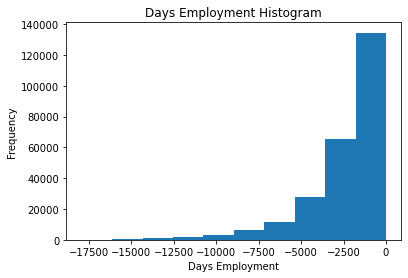

In [53]:
# Create an anomalous flag column
df_train['DAYS_EMPLOYED_ANOM'] = df_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
df_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

df_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');  #0 now reflected as the minimu amount of days worked

In [54]:
df_test['DAYS_EMPLOYED_ANOM'] = df_test["DAYS_EMPLOYED"] == 365243
df_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (df_test["DAYS_EMPLOYED_ANOM"].sum(), len(df_test)))

There are 9274 anomalies in the test data out of 48744 entries


In [55]:
### Correlations ###

In [56]:
# Find correlations with the target and sort
correlations = df_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

In [57]:
#Find the correlation of the positive days since birth and target
df_train['DAYS_BIRTH'] = abs(df_train['DAYS_BIRTH'])
df_train['DAYS_BIRTH'].corr(df_train['TARGET'])

-0.07823930830982712

As the client gets older, there is a negative linear relationship with the target meaning that as clients get older, they tend to repay their loans on time more often.

In [58]:
# Age information into a separate dataframe
age_data = df_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [59]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


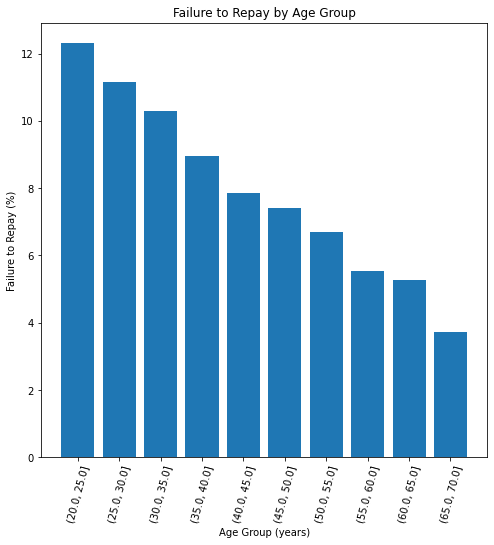

In [60]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

In [61]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = df_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


In [62]:
df_train.shape

(307511, 276)

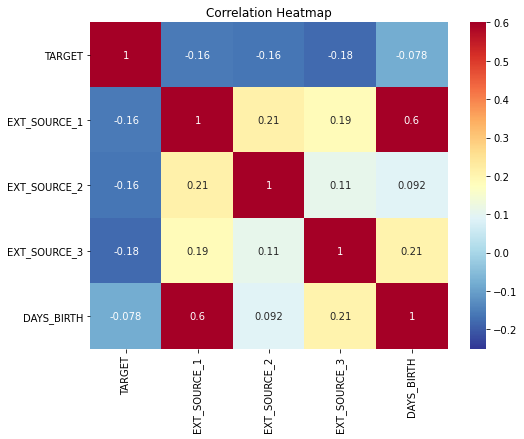

In [63]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

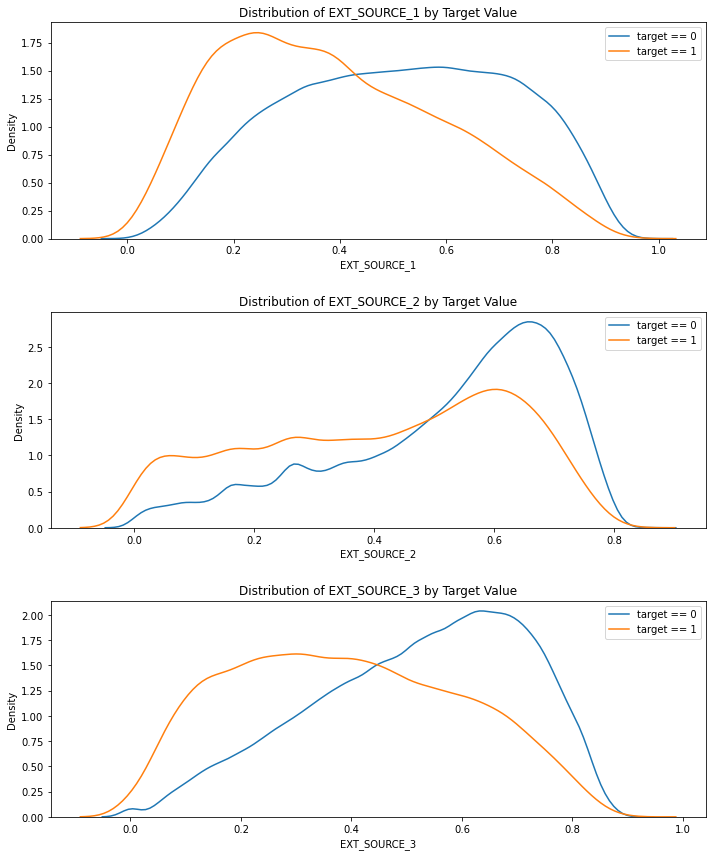

In [64]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(df_train.loc[df_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(df_train.loc[df_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

#### Feature Engineering ####

In [65]:
# Make a new dataframe for polynomial features
poly_features = df_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = df_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [66]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


In [67]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))
poly_features.head()

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


,1,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,EXT_SOURCE_1^2,EXT_SOURCE_1 EXT_SOURCE_2,EXT_SOURCE_1 EXT_SOURCE_3,EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_2^2,EXT_SOURCE_2 EXT_SOURCE_3,EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_3^2,EXT_SOURCE_3 DAYS_BIRTH,DAYS_BIRTH^2,EXT_SOURCE_1^3,EXT_SOURCE_1^2 EXT_SOURCE_2,EXT_SOURCE_1^2 EXT_SOURCE_3,EXT_SOURCE_1^2 DAYS_BIRTH,EXT_SOURCE_1 EXT_SOURCE_2^2,EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3,EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_1 EXT_SOURCE_3^2,EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH,EXT_SOURCE_1 DAYS_BIRTH^2,EXT_SOURCE_2^3,EXT_SOURCE_2^2 EXT_SOURCE_3,EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_2 EXT_SOURCE_3^2,EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH,EXT_SOURCE_2 DAYS_BIRTH^2,EXT_SOURCE_3^3,EXT_SOURCE_3^2 DAYS_BIRTH,EXT_SOURCE_3 DAYS_BIRTH^2,DAYS_BIRTH^3,TARGET
0,1.0,0.083037,0.262949,0.139376,9461.0,0.006895,0.021834,0.011573,785.612748,0.069142,0.036649,2487.756636,0.019426,1318.634256,89510521.0,0.000573,0.001813,0.000961,65.234900,0.005741,0.003043,206.575767,0.001613,109.495390,7.432682e+06,0.018181,0.009637,654.152107,0.005108,346.733022,2.353667e+07,0.002707,183.785678,1.247560e+07,8.468590e+11,1
1,1.0,0.311267,0.622246,0.535276,16765.0,0.096887,0.193685,0.166614,5218.396475,0.387190,0.333073,10431.950422,0.286521,8973.906339,281065225.0,0.030158,0.060288,0.051861,1624.316241,0.120520,0.103675,3247.125160,0.089185,2793.283699,8.748642e+07,0.240927,0.207254,6491.237078,0.178286,5583.975307,1.748916e+08,0.153368,4803.518937,1.504475e+08,4.712058e+12,0
2,1.0,0.505998,0.555912,0.729567,19046.0,0.256034,0.281290,0.369159,9637.236584,0.309038,0.405575,10587.901540,0.532268,13895.327191,362750116.0,0.129553,0.142332,0.186794,4876.421768,0.156373,0.205220,5357.456268,0.269326,7031.006802,1.835508e+08,0.171798,0.225464,5885.942404,0.295894,7724.580288,2.016572e+08,0.388325,10137.567875,2.646504e+08,6.908939e+12,0
3,1.0,0.505998,0.650442,0.535276,19005.0,0.256034,0.329122,0.270849,9616.490669,0.423074,0.348166,12361.644326,0.286521,10172.925140,361190025.0,0.129553,0.166535,0.137049,4865.924377,0.214075,0.176171,6254.966447,0.144979,5147.479068,1.827614e+08,0.275185,0.226462,8040.528832,0.186365,6616.894625,2.349331e+08,0.153368,5445.325225,1.933364e+08,6.864416e+12,0
4,1.0,0.505998,0.322738,0.535276,19932.0,0.256034,0.163305,0.270849,10085.550751,0.104160,0.172754,6432.819536,0.286521,10669.126224,397284624.0,0.129553,0.082632,0.137049,5103.267808,0.052705,0.087413,3254.993372,0.144979,5398.555790,2.010252e+08,0.033616,0.055754,2076.117157,0.092471,3443.335521,1.282190e+08,0.153368,5710.929881,2.126570e+08,7.918677e+12,0


In [68]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = df_train['SK_ID_CURR']
df_train = df_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = df_test['SK_ID_CURR']
df_test = df_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
df_train, df_test = df_train.align(df_test, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', df_train.shape)
print('Testing data with polynomial features shape:  ', df_test.shape)

Training data with polynomial features shape:  (307511, 310)
Testing data with polynomial features shape:   (48744, 310)


In [69]:
df_train['TARGET'] = poly_target
df_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [70]:
df_train.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY_x',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       ...
       'EXT_SOURCE_2^2 EXT_SOURCE_3', 'EXT_SOURCE_2^2 DAYS_BIRTH',
       'EXT_SOURCE_2 EXT_SOURCE_3^2', 'EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH',
       'EXT_SOURCE_2 DAYS_BIRTH^2', 'EXT_SOURCE_3^3',
       'EXT_SOURCE_3^2 DAYS_BIRTH', 'EXT_SOURCE_3 DAYS_BIRTH^2',
       'DAYS_BIRTH^3', 'TARGET'],
      dtype='object', length=311)

In [71]:
### Domain Knowledge implementation ###
df_train.shape

(307511, 311)

In [72]:
df_train['CREDIT_INCOME_PERCENT'] = df_train['AMT_CREDIT'] / df_train['AMT_INCOME_TOTAL']
df_train['ANNUITY_INCOME_PERCENT'] = df_train['AMT_ANNUITY_x'] / df_train['AMT_INCOME_TOTAL']
df_train['CREDIT_TERM'] = df_train['AMT_ANNUITY_x'] / df_train['AMT_CREDIT']
df_train['DAYS_EMPLOYED_PERCENT'] = df_train['DAYS_EMPLOYED'] / df_train['DAYS_BIRTH_x']
#df_train['TARGET'] = train_labels  # Readd Target for training data

In [73]:
df_test['CREDIT_INCOME_PERCENT'] = df_test['AMT_CREDIT'] / df_test['AMT_INCOME_TOTAL']
df_test['ANNUITY_INCOME_PERCENT'] = df_test['AMT_ANNUITY_x'] / df_test['AMT_INCOME_TOTAL']
df_test['CREDIT_TERM'] = df_test['AMT_ANNUITY_x'] / df_test['AMT_CREDIT']
df_test['DAYS_EMPLOYED_PERCENT'] = df_test['DAYS_EMPLOYED'] / df_test['DAYS_BIRTH_x']

In [74]:
# Missing values statistics
missing_values = missing_values_table(df_train)
missing_values.head(20)

Your selected dataframe has 315 columns.
There are 88 columns that have missing values.


,Missing Values,% of Total Values
AMT_ANNUITY_y,189287,61.6
LANDAREA_MEDI,182590,59.4
LANDAREA_AVG,182590,59.4
LANDAREA_MODE,182590,59.4
BASEMENTAREA_MEDI,179943,58.5
BASEMENTAREA_AVG,179943,58.5
BASEMENTAREA_MODE,179943,58.5
EXT_SOURCE_1_x,173378,56.4
NONLIVINGAREA_MODE,169682,55.2
NONLIVINGAREA_MEDI,169682,55.2


In [75]:
##### Replace all missing values ####

In [76]:
df_train = df_train.fillna(df_train.mean())

In [77]:
##Using a subset of the data to build model ###
#df_DEFAULT = df_train[df_train['TARGET'] == 1]
#df_DEFAULT = df_DEFAULT[:6000]

#df_NO_DEFAULT = df_train[df_train['TARGET'] == 0]
##df_NO_DEFAULT = df_NO_DEFAULT[:24000]
#df_train = pd.concat([df_DEFAULT, df_NO_DEFAULT])
df_train['TARGET'].isnull().any()

False

Dimenstioanlity reduction

In [78]:
# Calculate the correlation matrix and take the absolute value
corr = df_train.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr, dtype=bool))
tri_df = corr.mask(mask)

# List column names of highly correlated features (r > 0.6)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.6)]  #Drop columsn that are highly correlated
print(len(to_drop), to_drop)


90 ['CNT_CHILDREN', 'AMT_CREDIT', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE', 'DAYS_BIRTH_x', 'DAYS_EMPLOYED', 'FLAG_EMP_PHONE', 'REGION_RATING_CLIENT', 'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1_x', 'EXT_SOURCE_2_x', 'EXT_SOURCE_3_x', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'LANDAREA_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'LANDAREA_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'LIVINGAREA_MEDI', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'AMT_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 'CREDIT_ACTIVE_Activ', 'CREDIT_CURRENCY_currency 1', 'CREDIT_TYPE_Consumer credit', 'DAYS_CREDIT', 'DAYS_CREDIT_UPDATE', 'CNT_INSTALMENT', 'NAME_CONTRACT_STATUS_Activ', 'CODE_GE

In [79]:
# Drop those columnsreduced_df = chest_df.drop(to_drop, axis=1)
df_train = df_train.drop(to_drop, axis=1)
df_test = df_test.drop(to_drop, axis=1)

In [80]:
#### Modeling ####

In [81]:
df_train = df_train.fillna(df_train.mean())

In [82]:
df_DEFAULT = df_train[df_train['TARGET'] == 1]
df_DEFAULT = df_DEFAULT[:1000]

df_NO_DEFAULT = df_train[df_train['TARGET'] == 0]
df_NO_DEFAULT = df_NO_DEFAULT[:10000]
df_train = pd.concat([df_DEFAULT, df_NO_DEFAULT])
df_train['TARGET'].isnull().any()

False

In [83]:
df_train.shape

(11000, 225)

In [84]:
X = np.array(df_train.drop(['TARGET'], axis=1))
y = np.array(df_train['TARGET'])

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
from sklearn.preprocessing import MinMaxScaler as Scaler

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)

In [88]:
mm_scaler = Scaler()
mm_scaler.fit(X_train)
X_train_scaled = mm_scaler.transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)

In [89]:
sdf = pd.DataFrame(X_train_scaled)
sdf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223
0,0.007911,0.0,0.0,1.0,0.000858,0.241316,0.499600,0.944284,0.0,1.0,1.0,1.0,0.0,0.125,1.0,0.272727,0.0,0.0,0.0,0.0,0.978100,0.067169,0.028236,0.077600,0.238095,0.40000,0.919910,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.25,0.0,0.0000,0.000,0.076923,0.009457,0.490511,0.325223,0.008645,0.000572,0.000827,0.003362,0.009270,0.000062,0.0,0.000000,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.120064,0.888029,0.060870,0.110526,0.0,0.0,0.0,0.125000,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.276836,0.150890,0.080188,0.944383
1,0.775305,0.0,0.0,0.0,0.000358,0.250272,0.922392,0.342325,0.0,0.0,1.0,0.0,0.0,0.000,0.5,0.363636,0.0,0.0,0.0,0.0,0.977752,0.067169,0.028236,0.102547,0.000000,0.00000,0.198845,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0000,0.125,0.307692,0.005843,0.446453,0.484796,0.000000,0.001052,0.000000,0.016379,0.017975,0.000282,0.0,0.285714,0.0,0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.256657,0.965570,0.278261,0.973684,0.0,0.0,0.0,0.000000,0.0,0.0,0.333333,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.802954,0.066324,0.057518,0.775884
2,0.757782,0.0,1.0,1.0,0.000935,0.199567,0.459304,0.385838,0.0,0.0,1.0,0.0,0.0,0.125,0.5,0.409091,0.0,0.0,0.0,0.0,0.977752,0.067169,0.028236,0.102547,0.000000,0.00000,0.956816,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0000,0.000,0.000000,0.027634,0.675278,0.090201,0.095092,0.000572,0.000000,0.006352,0.016590,0.000062,0.0,0.000000,0.0,0.700000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.119391,0.912123,0.158841,0.915789,0.0,0.0,0.0,0.000000,0.0,0.0,0.133333,0.0,0.000041,0.000058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [90]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import time

In [91]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import datetime

In [92]:
models = []
models.append(('SVC', SVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTR', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))

In [101]:
results = {}
for name, model in models:
    start_time = datetime.datetime.now()
    kfold = model_selection.KFold(n_splits=10)
    score_results = model_selection.cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring ='accuracy')
    elapsed_time = datetime.datetime.now() - start_time
    elapsed_time = elapsed_time.microseconds / 1000
    results[name] = score_results.mean()
    
for key, value in results.items():
    print(("%s => %f" % (key, value)), "Time elapsed: {} ms".format(elapsed_time)) 

SVC => 0.911250 Time elapsed: 375.152 ms
RFC => 0.923636 Time elapsed: 375.152 ms
LR => 0.910682 Time elapsed: 375.152 ms
KNN => 0.906705 Time elapsed: 375.152 ms
DTR => 0.851818 Time elapsed: 375.152 ms
GNB => 0.133409 Time elapsed: 375.152 ms


In [102]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = {
    'n_estimators' : [100, 150, 200],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [10, 30, 50],
    'verbose' : [0.1, 0.5, 1],
    'n_jobs': [1,-1]
    
}
rfc_model = RandomForestClassifier()
gridSearch = GridSearchCV(rfc_model, tuned_parameters, cv=10, scoring='accuracy')
gridSearch.fit(X_train_scaled, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 150, 200], 'n_jobs': [1, -1],
                         'random_state': [10, 30, 50],
                         'verbose': [0.1, 0.5, 1]},
             scoring='accuracy')

In [103]:
gridSearch.best_score_

0.9244318181818182

In [104]:
gridSearch.best_params_

{'criterion': 'gini',
 'max_features': 'auto',
 'n_estimators': 200,
 'n_jobs': 1,
 'random_state': 50,
 'verbose': 0.1}

In [105]:
rfc = gridSearch.best_estimator_

In [106]:
rfc.fit(X_train_scaled, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    4.2s finished


RandomForestClassifier(n_estimators=200, n_jobs=1, random_state=50, verbose=0.1)

In [107]:
#Extract feature importances
#features_train = imputer.fit_transform(df_train)
#feature_importance = rfc.feature_importances_
#feature_importances = pd.DataFrame({'feature': features_train, 'importance': feature_importance})

In [108]:
accuracy = rfc.score(X_test_scaled, y_test)
print(accuracy)

0.9154545454545454


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


In [109]:
Y_predict_test = rfc.predict(X_test_scaled)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


In [110]:
results = confusion_matrix(y_test, Y_predict_test)
print(results)

[[1981    0]
 [ 186   33]]


In [111]:
#### Area under the curve####

In [112]:
"Total Area Under the Curve is: ", roc_auc_score(y_test, rfc.predict_proba(X_test_scaled)[:,1]).round(2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


('Total Area Under the Curve is: ', 0.68)

In [113]:
df_train = df_train.drop(['TARGET'], 1)

In [114]:
df_train.shape

(11000, 224)

In [115]:
train_output = mm_scaler.fit(df_train)
train_output = mm_scaler.transform(df_train)
train_predict = rfc.predict(train_output)
train_proba = rfc.predict_proba(train_output)[:, 1]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished


In [116]:
df_train['TARGET'] = train_labels
df_train['Prediction'] = train_predict
df_train['Default_Probability'] = train_proba
df_train

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,LIVE_CITY_NOT_WORK_CITY,YEARS_BEGINEXPLUATATION_MEDI,LANDAREA_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_PAYMENT,DAYS_INSTALMENT,NUM_INSTALMENT_NUMBER,NUM_INSTALMENT_VERSION,AMT_ANNUITY_y,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CNT_CREDIT_PROLONG,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4,CREDIT_DAY_OVERDUE,CREDIT_TYPE_Another type of lo,CREDIT_TYPE_Car lo,CREDIT_TYPE_Cash loan (non-earmarked),CREDIT_TYPE_Credit card,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microlo,CREDIT_TYPE_Mobile operator lo,CREDIT_TYPE_Mortgag,CREDIT_TYPE_Real estate lo,CREDIT_TYPE_Unknown type of lo,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,CNT_INSTALMENT_FUTURE,MONTHS_BALANCE,NAME_CONTRACT_STATUS_Amortized debt,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Returned to the stor,NAME_CONTRACT_STATUS_Signed,NAME_CONTRACT_STATUS_XNA,SK_DPD,SK_DPD_DEF,CODE_GENDER_M,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATI

In [117]:
#remove na from test
df_test = df_test.fillna(df_test.mean())

In [118]:
df_test = df_test[:5000]
test_output = mm_scaler.transform(df_test)
test_predict = rfc.predict(test_output)
test_proba = rfc.predict_proba(test_output)[:, 1]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


In [119]:
df_test['Prediction'] = test_predict
df_test['Default_Probability'] = test_proba
df_test.Prediction.value_counts()

1    3380
0    1620
Name: Prediction, dtype: int64

In [120]:
df_test.Prediction.value_counts()

1    3380
0    1620
Name: Prediction, dtype: int64

In [121]:
from sklearn.datasets import make_classification

X_train, y_train = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)

rfc.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished


RandomForestClassifier(n_estimators=200, n_jobs=1, random_state=50, verbose=0.1)

In [122]:
max_depth = list()
for tree in rfc.estimators_:
    max_depth.append(tree.tree_.max_depth)

print("avg max depth is %0.1f" % (sum(max_depth) / len(max_depth)))

avg max depth is 10.1


In [123]:
dftrain.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [124]:
#Dashboard Column Generation

In [125]:
dftrain['Prediction'] = df_train['Prediction']
dftrain['Default_Probability'] = df_train['Default_Probability']
dftrain['TARGET'] = df_train['TARGET']
dftrain['Default_Probability'].dtype

dtype('float64')

In [126]:
risk = []
for val in dftrain['Default_Probability']:
    if val <= 0.6:
        risk.append('Low')
    elif val <= 0.85:
        risk.append('Medium')
    else:
        risk.append('High')

dftrain['Risk'] = risk

In [127]:
dftrain['Liability'] = np.where(dftrain['Default_Probability']>=0.6, dftrain['AMT_CREDIT'], 0)
l_target = [] #Liability Target
for val in dftrain['Liability']:
    val = val * 0.6
    l_target.append(val)
dftrain['Liability_Target'] = l_target

In [128]:
d_target = [] #Default Target
for val in dftrain['Default_Probability']:
    val = val * 0.8
    d_target.append(val)
dftrain['Default_Target'] = d_target

In [129]:
test['Prediction'] = df_test['Prediction']
test['Default_Probability'] = df_test['Default_Probability']

In [130]:
risk_test = []
for val in test['Default_Probability']:
    if val <= 0.6:
        risk_test.append('Low')
    elif val <= 0.85:
        risk_test.append('Medium')
    else:
        risk_test.append('High')

test['Risk'] = risk_test

In [131]:
test['Liability'] = np.where(test['Default_Probability']>=0.6, test['AMT_CREDIT'], 0)
test_l_target = []  #test Liability Target
for val in test['Liability']:
    val = val * 0.6
    test_l_target.append(val)
test['Liability_Target'] = test_l_target

In [132]:
test_d_target = [] #Default Target
for val in test['Default_Probability']:
    val = val * 0.8
    test_d_target.append(val)
test['Default_Target'] = test_d_target

In [133]:
dftrain['Correct_Prediction'] = np.where(dftrain['TARGET']== dftrain['Prediction'],'Correct','Incorrect')
dftrain = dftrain[dftrain['Correct_Prediction']=='Correct']

In [134]:
dftrain.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Prediction,Default_Probability,Risk,Liability,Liability_Target,Default_Target,Correct_Prediction
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.796,0.0605,0.08,0.0345,0.2917,0.3333,0.013,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.804,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055,Low,0.0,0.0,0.044,Correct
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.180,Low,0.0,0.0,0.144,Correct
3,100006,0.0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [135]:
#Amount Overdue / Defaulted

In [136]:
thirtyday_target = []
for val in dftrain['DEF_30_CNT_SOCIAL_CIRCLE']:
    val = val * 0.6
    thirtyday_target.append(val)
dftrain['30_Day_Default_Target'] = thirtyday_target


sixtyday_target = []
for val in dftrain['DEF_60_CNT_SOCIAL_CIRCLE']:
    val = val * 0.6
    sixtyday_target.append(val)
dftrain['60_CNT_SOCIAL_CIRCLE'] = sixtyday_target

In [137]:
test_thirtyday_target = []
for val in test['DEF_30_CNT_SOCIAL_CIRCLE']:
    val = val * 0.6
    test_thirtyday_target.append(val)
test['30_Day_Default_Target'] = test_thirtyday_target


test_sixtyday_target = []
for val in test['DEF_60_CNT_SOCIAL_CIRCLE']:
    val = val * 0.6
    test_sixtyday_target.append(val)
test['60_CNT_SOCIAL_CIRCLE'] = test_sixtyday_target

In [138]:
#Years of Birth

In [139]:
dftrain['YEARS_BIRTH'] = dftrain['DAYS_BIRTH']/-365
test['YEARS_BIRTH'] = test['DAYS_BIRTH']/-365

In [140]:
#bin for age groups
dftrain['YEARS_BINNED'] = pd.cut(dftrain['YEARS_BIRTH'], bins = np.linspace(18, 70, num = 11))
test['YEARS_BINNED'] = pd.cut(test['YEARS_BIRTH'], bins = np.linspace(18, 70, num = 11))

In [141]:
len(test)

48744

In [142]:
#percent default
dflt = []
for val in dftrain['TARGET']:
    if val == 1:
        val = (1/len(dftrain)) * 100        
    else:
        val = 0
    dflt.append(val)
dftrain['Def_Percent'] = dflt    

In [143]:
#percent default
test_dflt = []
for val in test['Prediction']:
    if val == 1:
        val = (1/len(dftrain)) * 100        
    else:
        val = 0
    test_dflt.append(val)
test['Def_Percent'] = test_dflt 

In [144]:
#Variance in Installment vs Actual Payment

In [145]:
inst_pmnt['Variance'] = inst_pmnt['AMT_INSTALMENT'] - inst_pmnt['AMT_PAYMENT']

In [146]:
#Creating csv files

In [147]:
"""dftrain = df_train.copy()
test = df_test.copy()
bureau = df_bureau.copy()
POS = df_POS.copy()
inst_pmnt = df_inst.copy()"""

'dftrain = df_train.copy()\ntest = df_test.copy()\nbureau = df_bureau.copy()\nPOS = df_POS.copy()\ninst_pmnt = df_inst.copy()'

In [148]:
dftrain['CREDIT_INCOME_PERCENT'] = dftrain['AMT_CREDIT'] / dftrain['AMT_INCOME_TOTAL']
test['CREDIT_INCOME_PERCENT'] = test['AMT_CREDIT'] / test['AMT_INCOME_TOTAL']

In [149]:
dftrain['credit:income:percent_target'] = np.where(dftrain['Liability'] !=0, dftrain['CREDIT_INCOME_PERCENT'] * 0.6, dftrain['CREDIT_INCOME_PERCENT'])
test['credit:income:percent_target'] = np.where(test['Liability'] !=0, test['CREDIT_INCOME_PERCENT'] * 0.6, test['CREDIT_INCOME_PERCENT'])

In [150]:
dftrain['Default_Target'].describe


<bound method NDFrame.describe of 1        0.044
2        0.144
3        0.088
4        0.028
5        0.108
         ...  
12822    0.652
12839    0.676
12840    0.716
12848    0.448
12853    0.648
Name: Default_Target, Length: 10710, dtype: float64>

In [167]:
#dftrain = dftrain.drop(columns =['Default Target'], axis=1)

In [152]:
test['TARGET'] = test['Prediction']

In [153]:
dftrain = dftrain.drop(columns =['Correct_Prediction'], axis=1)

## reduce credit alllocation ##

In [154]:
dftrain['Credit_Target'] = np.where(dftrain['Liability'] !=0, dftrain['AMT_CREDIT'] * 0.6, dftrain['AMT_CREDIT'])                                 

In [155]:
test['Credit_Target'] = np.where(test['Liability'] !=0, test['AMT_CREDIT'] * 0.6, test['AMT_CREDIT'])

In [156]:
###### Flattening Files #####

In [157]:
d_class = []
for val in dftrain['SK_ID_CURR']:
    d_class.append('Actual')
dftrain['Data_Class'] = d_class

In [158]:
dftrain = dftrain.drop(columns =['Data_Class'], axis=1)

In [159]:
test_d_class = []
for val in test['SK_ID_CURR']:
    test_d_class.append('Projection')
test['Data_Class'] = test_d_class

In [160]:
dftrain, test = dftrain.align(test, join='inner', axis=1)

In [161]:
df_complete = pd.concat([dftrain, test])

In [162]:
df_complete.shape, test.shape, dftrain.shape

((59454, 136), (48744, 136), (10710, 136))

In [163]:
#test.head()

In [164]:
#dftrain.to_csv("Output/predicted_application.csv")
#test.to_csv("Output/predicted_test.csv")

In [165]:
df_complete.to_csv("Output/complete_dataset.csv")
#inst_pmnt.to_csv("Output/installation_paymentsf.csv")

In [166]:
df_complete['TARGET'].value_counts()

0.0    11620
1.0     4090
Name: TARGET, dtype: int64